# Bland Altman Analyses

Read in the estimates

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.agreement import mean_diff_plot

#file_path = '/Users/reblocke/Research/llm_estimate_lrs/Past Runs/Copy of NNT_LRs_PC_03.16.2025.xlsx'
file_path = '/Users/blocke/Box Sync/Residency Personal Files/Scholarly Work/Locke Research Projects/llm_estimate_lrs/Past Runs/NNT_LRs_PC_04.18.2025.xlsx'
use_columns = ['lr_reported', 'lr_gpt-4o-mini-2024-07-18', 'lr_gpt-4o-2024-08-06', 'lr_o3-mini-2025-01-31', 'Feature Type']
df = pd.read_excel(file_path, sheet_name='Master', usecols=use_columns)

print(df.head())

   lr_reported  lr_gpt-4o-mini-2024-07-18  lr_gpt-4o-2024-08-06  \
0    34.400000                       10.0                  15.0   
1     0.010000                        0.1                   0.1   
2    17.435596                       10.0                   8.0   
3    14.000000                        5.0                   7.0   
4     6.400000                        3.5                   3.5   

   lr_o3-mini-2025-01-31     Feature Type  
0                  30.00  Imaging finding  
1                   0.05  Imaging finding  
2                   7.00          History  
3                  10.00     Sign/symptom  
4                   3.00     Sign/symptom  


First, ensure that there are no missing values - then create log transformed versions of each LR (aka "Weights of Evidence")

In [26]:
cols_to_log = ['lr_reported', 'lr_gpt-4o-mini-2024-07-18', 'lr_gpt-4o-2024-08-06', 'lr_o3-mini-2025-01-31']
df[cols_to_log].le(0).any()
for col in cols_to_log:
    df[f'ln_{col}'] = np.log(df[col])

In [27]:
# make sure Feature Type is a string and handle missing values
ft = df["Feature Type"].fillna("").astype(str)

df["test_results"]  = ft.str.contains(r"test",       case=False, na=False).astype(int)
df["imaging"]       = ft.str.contains(r"imaging",    case=False, na=False).astype(int)
df["history"]       = ft.str.contains(r"history",    case=False, na=False).astype(int)
df["sign_symptom"]  = ft.str.contains(r"sign|symptom", case=False, na=False).astype(int)
df["diagnosis"]     = ft.str.contains(r"diagnosis",  case=False, na=False).astype(int)

### Create Bland-Altman Plots for each

LR Reported vs 4o mini

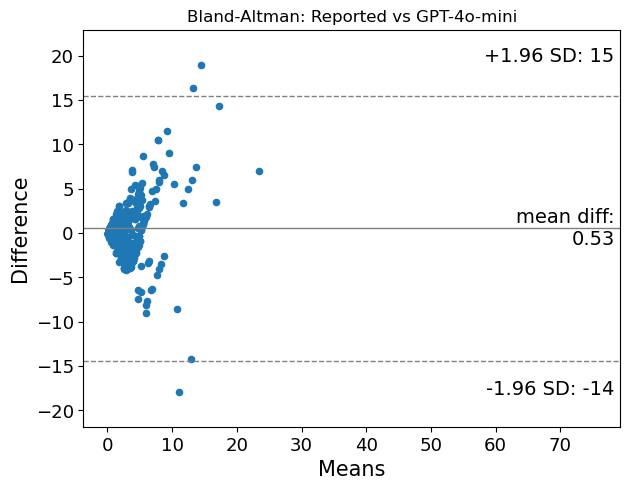

In [28]:
fig = mean_diff_plot(df['lr_reported'], df['lr_gpt-4o-mini-2024-07-18'])
plt.title('Bland-Altman: Reported vs GPT-4o-mini')
plt.show()

Log Transformed Version

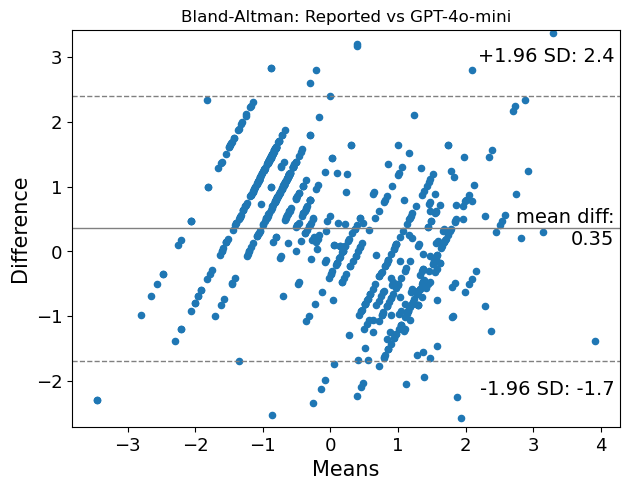

In [29]:
fig = mean_diff_plot(df['ln_lr_reported'], df['ln_lr_gpt-4o-mini-2024-07-18'])
plt.title('Bland-Altman: Reported vs GPT-4o-mini')
plt.show()

LR Reported vs 4o

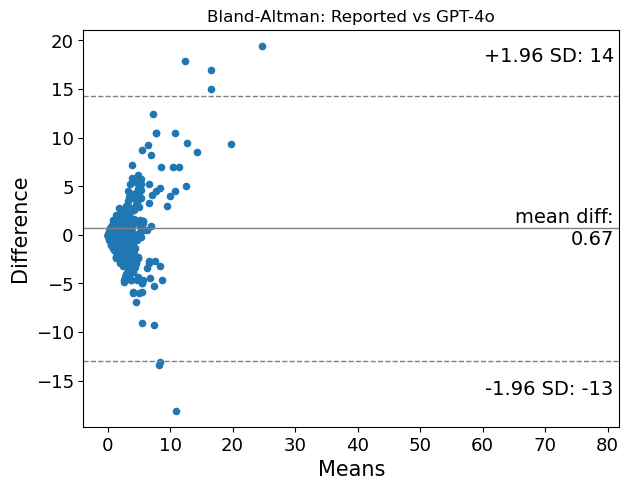

In [30]:
fig = mean_diff_plot(df['lr_reported'], df['lr_gpt-4o-2024-08-06'])
plt.title('Bland-Altman: Reported vs GPT-4o')
plt.show()

Log transformed version

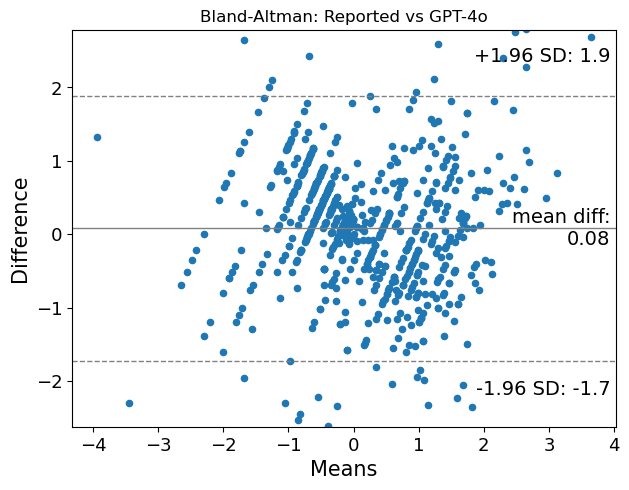

In [31]:
fig = mean_diff_plot(df['ln_lr_reported'], df['ln_lr_gpt-4o-2024-08-06'])
plt.title('Bland-Altman: Reported vs GPT-4o')
plt.show()

For o3-mini

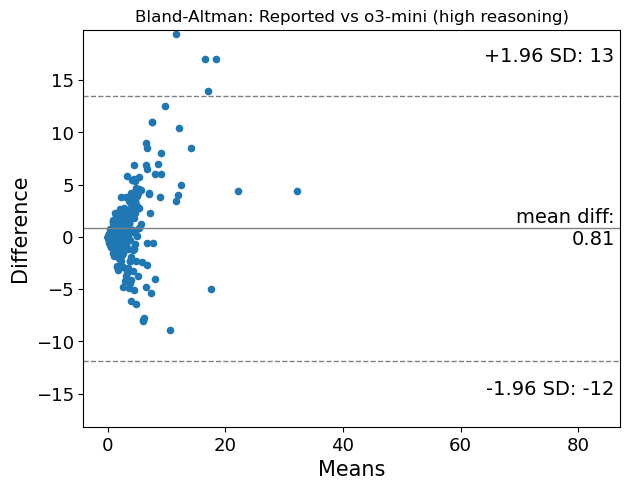

In [32]:
fig = mean_diff_plot(df['lr_reported'], df['lr_o3-mini-2025-01-31'])
plt.title('Bland-Altman: Reported vs o3-mini (high reasoning)')
plt.show()

logged version

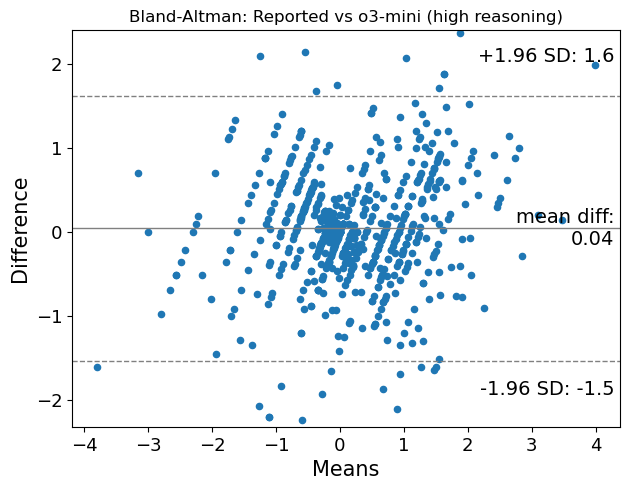

In [33]:
fig = mean_diff_plot(df['ln_lr_reported'], df['ln_lr_o3-mini-2025-01-31'])
plt.title('Bland-Altman: Reported vs o3-mini (high reasoning)')
plt.show()

Subgroups

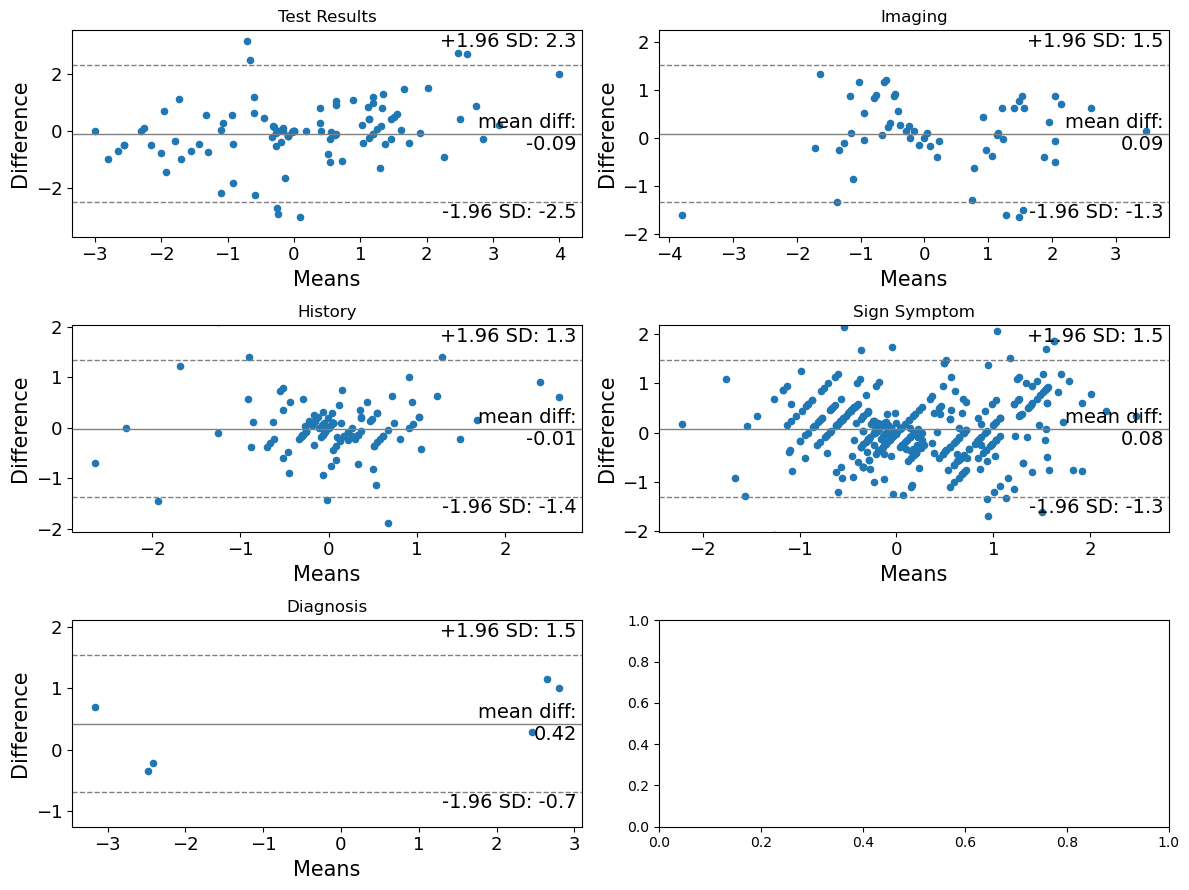

In [34]:
indicator_cols = [
    "test_results",   # 1 if 'Feature Type' string contained “test”
    "imaging",        # 1 if contained “imaging”
    "history",        # 1 if contained “history”
    "sign_symptom",   # 1 if contained “sign” or “symptom”
    "diagnosis"       # 1 if contained “diagnosis”
]

n = len(indicator_cols)
fig, axes = plt.subplots((n + 1) // 2, 2, figsize=(12, 3 * ((n + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(indicator_cols):
    mask = df[col] == 1
    if mask.sum() == 0:
        axes[i].axis("off")
        axes[i].set_title(f"{col} (no rows)")
        continue
    mean_diff_plot(
        df.loc[mask, "ln_lr_reported"],
        df.loc[mask, "ln_lr_o3-mini-2025-01-31"],
        ax=axes[i]
    )
    axes[i].set_title(col.replace("_", " ").title())

plt.tight_layout()
plt.show()